# Importing libraries

In [7]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [8]:
# Read dataset
df = pd.read_csv("./dataset.csv")
df.head()

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018


In [9]:
df.shape

(3504, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3503 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

# EDA

In [11]:
# Check data types
df.dtypes

Price                     int64
Street                   object
Area                     object
City                     object
Type                     object
Bedrooms                  int64
Bathrooms                 int64
Size(Sq. Ft.)             int64
Parking Space            object
Balcony or Terrace       object
Double Glazed Windows    object
Maintenance Staff        object
View                     object
Pet Policy               object
Lobby in Building        object
Family or Bachelor       object
Rent Year                 int64
dtype: object

In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price', 'Bedrooms', 'Bathrooms', 'Size(Sq. Ft.)', 'Rent Year'], object: ['Street', 'Area', 'City', 'Type', 'Parking Space', 'Balcony or Terrace', 'Double Glazed Windows', 'Maintenance Staff', 'View', 'Pet Policy', 'Lobby in Building', 'Family or Bachelor']}

In [13]:
# Check unique values
df.nunique()

Price                    137
Street                   304
Area                      51
City                       4
Type                       4
Bedrooms                   5
Bathrooms                  6
Size(Sq. Ft.)            269
Parking Space              2
Balcony or Terrace         2
Double Glazed Windows      2
Maintenance Staff          2
View                       5
Pet Policy                 2
Lobby in Building          2
Family or Bachelor         2
Rent Year                  3
dtype: int64

In [14]:
# Change the categorical type to categorical variables
df['Rent Year'] = df['Rent Year'].astype('object')
df.dtypes

Price                     int64
Street                   object
Area                     object
City                     object
Type                     object
Bedrooms                  int64
Bathrooms                 int64
Size(Sq. Ft.)             int64
Parking Space            object
Balcony or Terrace       object
Double Glazed Windows    object
Maintenance Staff        object
View                     object
Pet Policy               object
Lobby in Building        object
Family or Bachelor       object
Rent Year                object
dtype: object

- See the value types of each column to analyze the dataset features

In [15]:
df['City'].unique()

array([' Dhaka', ' Badda', nan, ' Malibagh', ' Banasree'], dtype=object)

In [16]:
df['City'].value_counts()

City
 Dhaka       3441
 Badda         57
 Malibagh       3
 Banasree       2
Name: count, dtype: int64

In [17]:
# Deleting rows that belong to city other than Dhaka, because it is the city with the highest number of houses
# Deleting house types with wrong values
# Replacing house view misspelled values
df = df.drop(df[df['City'] != ' Dhaka'].index)
df = df.drop(df[df['Type'] == 'd'].index)
df['View'].replace(['west'], 'West', inplace = True)

In [18]:
# Checking missing values
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

In [19]:
df['Rent Year'].value_counts()

Rent Year
2016    1187
2018    1132
2017    1121
Name: count, dtype: int64

In [20]:
# Labeling values for better interpretation
df['City'] = df['City'].replace({ 1: " Dhaka" })
df['Type'] = df['Type'].replace({ 1: "Apartment", 2: "Room", 3: "Duplex" })
df['Parking Space'] = df['Parking Space'].replace({ 1: " Yes", 0: "No" })
df['Balcony or Terrace'] = df['Balcony or Terrace'].replace({ 1: " Yes", 0: "No" })
df['Double Glazed Windows'] = df['Double Glazed Windows'].replace({ 1: " Yes", 0: "No" })
df['Maintenance Staff'] = df['Maintenance Staff'].replace({ 1: " Yes", 0: "No" })
df['View'] = df['View'].replace({ 1: " Yes", 0: "No" })
df['Pet Policy'] = df['Pet Policy'].replace({ 1: " Yes", 0: "No" })
df['Lobby in Building'] = df['Lobby in Building'].replace({ 1: " Yes", 0: "No" })
df['Family or Bachelor'] = df['Family or Bachelor'].replace({ 1: " Yes", 0: "No" })
df['Rent Year'] = df['Rent Year'].replace({ 0: " 2016", 1: "2017", 2: "2018" })
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [21]:
# Check basic stats
df.describe()

,Price,Bedrooms,Bathrooms,Size(Sq. Ft.),Rent Year
count,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000
mean,20356.489244,2.474419,2.305814,1089.933721,2016.984012
std,16641.359474,0.694294,0.910072,547.962762,0.821017
min,4000.000000,1.000000,1.000000,250.000000,2016.000000
25%,12000.000000,2.000000,2.000000,720.000000,2016.000000
50%,16000.000000,2.000000,2.000000,950.000000,2017.000000
75%,23000.000000,3.000000,3.000000,1300.000000,2018.000000
max,300000.000000,5.000000,6.000000,11700.000000,2018.000000


In [22]:
# Replace with median values
# df['Price'].fillna(df['Price'].median(), inplace=True)
# Check for missing values  and replace them
df.fillna(method='ffill', inplace=True)
df

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_49429/1715100295.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [23]:
# Check for duplicate values
df[df.duplicated()]

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
489,16000,Uttar Khan Mazar Road,Dakshin Khan,Dhaka,Apartment,3,3,1150,Yes,Yes,Yes,Yes,East,No,No,Yes,2016
993,11000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
1007,10500,Section 12,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,North,No,No,Yes,2016
1090,12000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2017
1113,13500,Shahid Nagar,Lalbagh,Dhaka,Apartment,2,2,950,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
1125,20000,Block F,Bashundhara R/A,Dhaka,Apartment,2,2,800,Yes,Yes,Yes,Yes,West,No,No,Yes,2018
1151,12000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2016
1181,10000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
1230,12000,Section 11,Mirpur,Dhaka,Apartment,2,2,650,Yes,Yes,Yes,Yes,South,No,No,Yes,2016
1254,28000,Lake Circus Road,Kalabagan,Dhaka,Apartment,3,3,1300,Yes,Yes,Yes,Yes,South,No,No,Yes,2016


In [24]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

In [25]:
# Statistics summary
df.describe()

,Price,Bedrooms,Bathrooms,Size(Sq. Ft.),Rent Year
count,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,20397.011160,2.476358,2.308076,1091.709838,2016.985022
std,16698.382457,0.696083,0.912092,549.611193,0.820248
min,4000.000000,1.000000,1.000000,250.000000,2016.000000
25%,12000.000000,2.000000,2.000000,720.000000,2016.000000
50%,16000.000000,2.000000,2.000000,950.000000,2017.000000
75%,23000.000000,3.000000,3.000000,1305.000000,2018.000000
max,300000.000000,5.000000,6.000000,11700.000000,2018.000000


In [26]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     0
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

In [27]:
df.shape

(3405, 17)

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

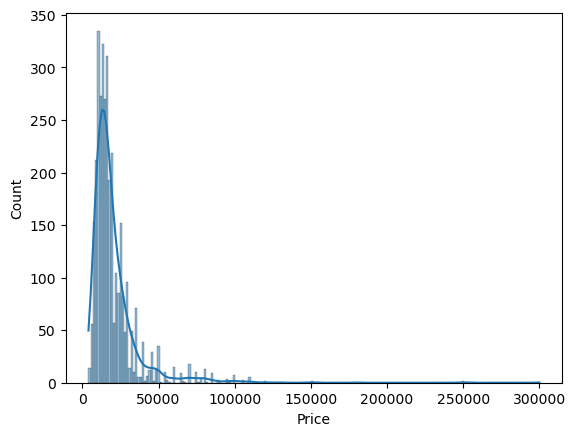

In [28]:
sns.histplot(df['Price'], kde=True)

In [29]:
# Check for outliers and how to remove them
from scipy.stats import zscore
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
outliers_mask = (z_scores < 3).all(axis=1)  # Adjust the threshold as needed (e.g., 3)
df = df[outliers_mask]
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


In [30]:
df['Price'].describe()

count     3316.000000
mean     18579.560615
std      10488.157978
min       4000.000000
25%      12000.000000
50%      16000.000000
75%      22000.000000
max      70000.000000
Name: Price, dtype: float64

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

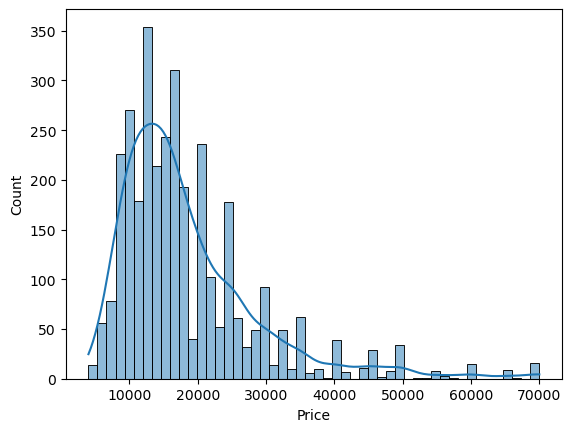

In [31]:
sns.histplot(df['Price'], kde=True)

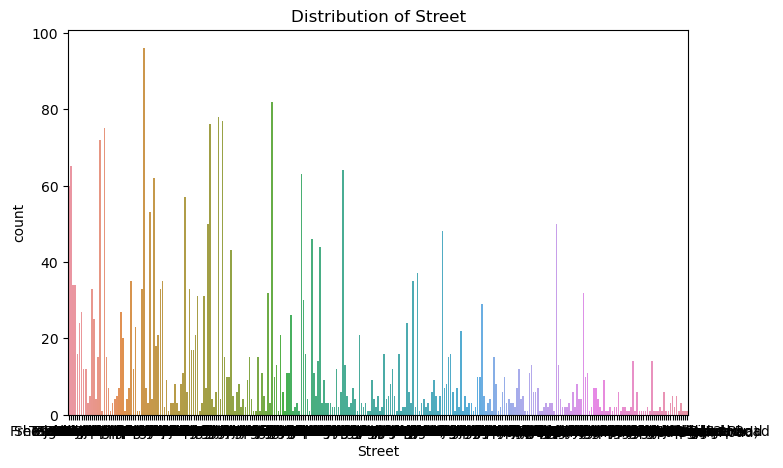

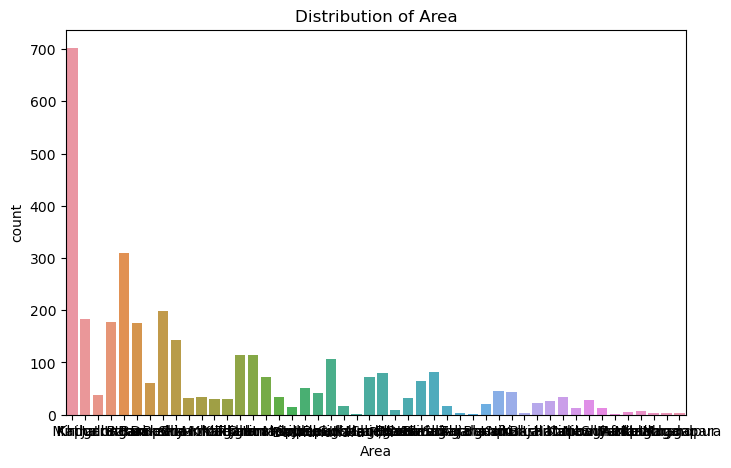

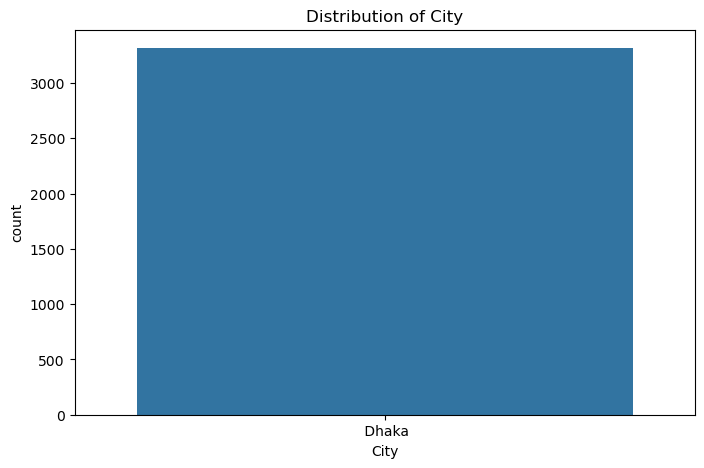

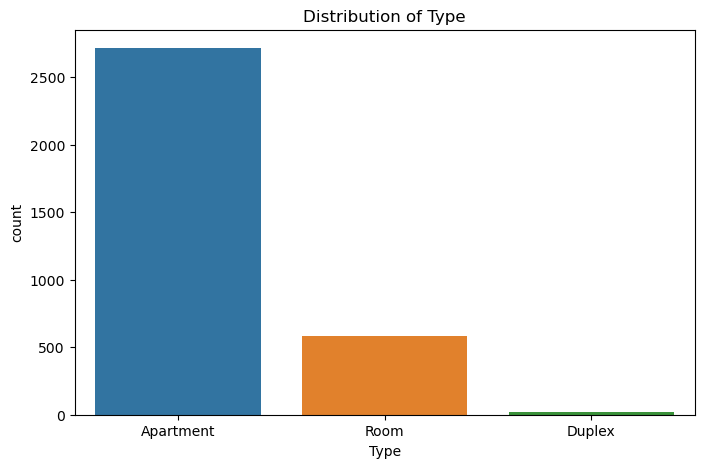

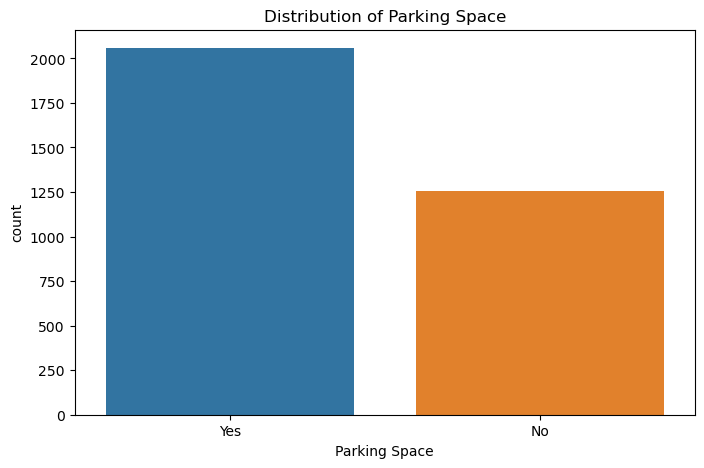

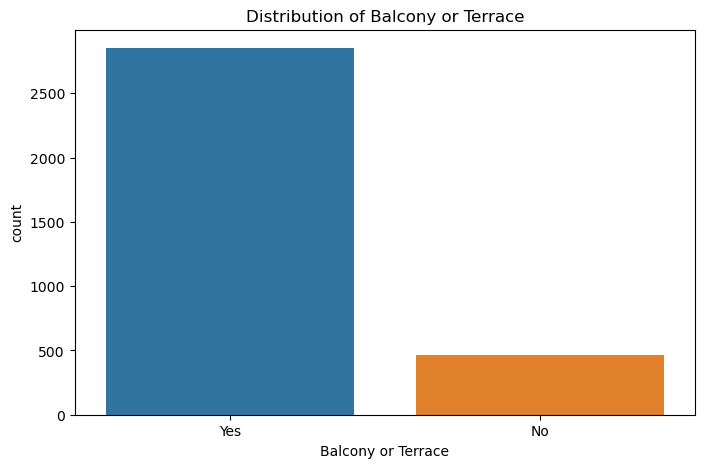

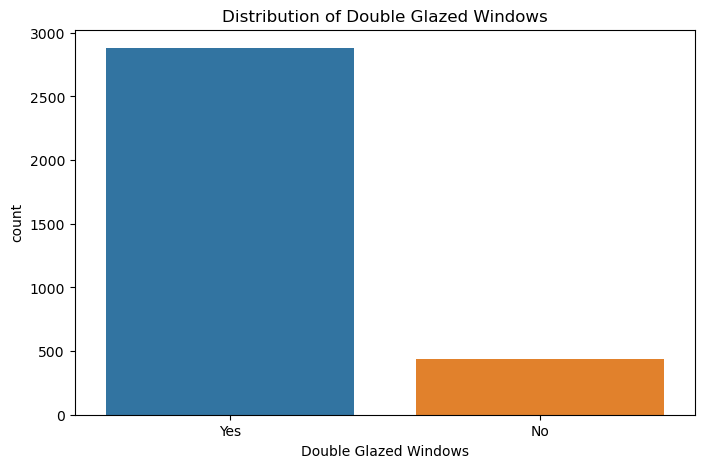

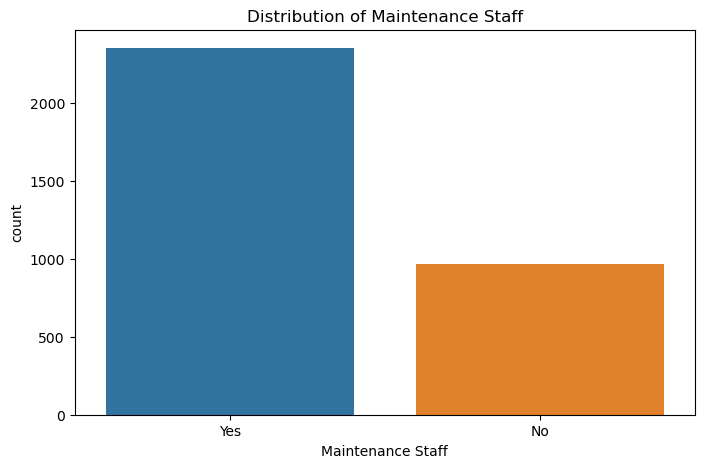

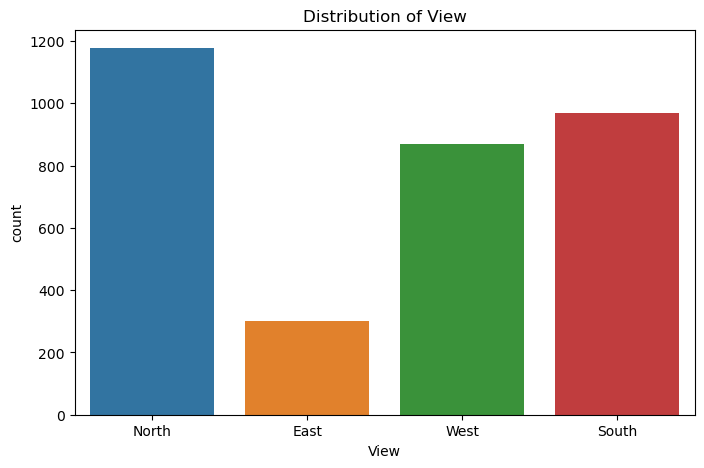

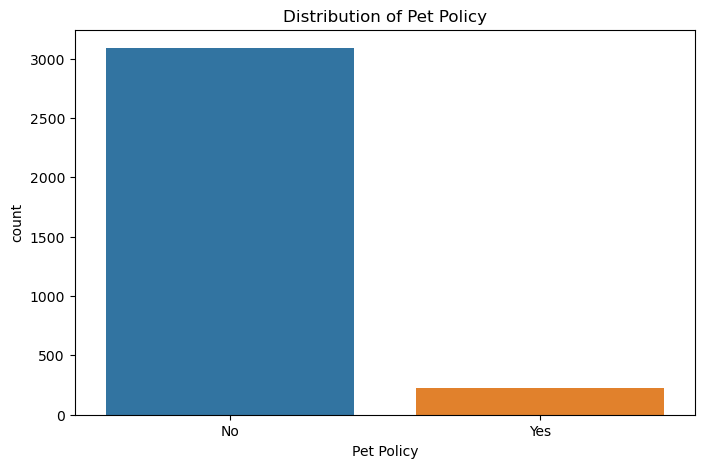

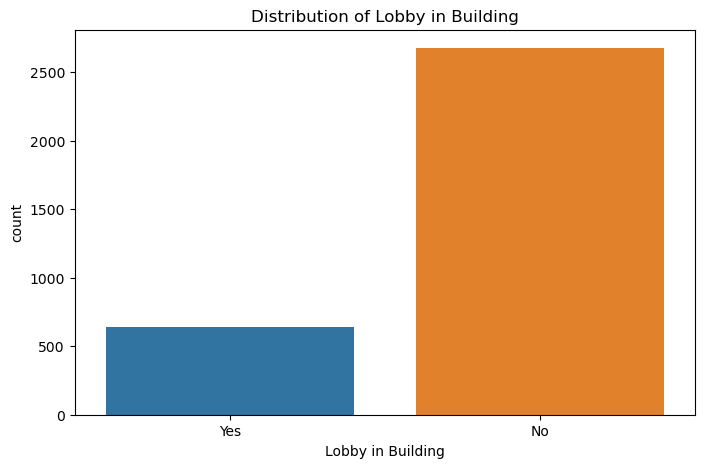

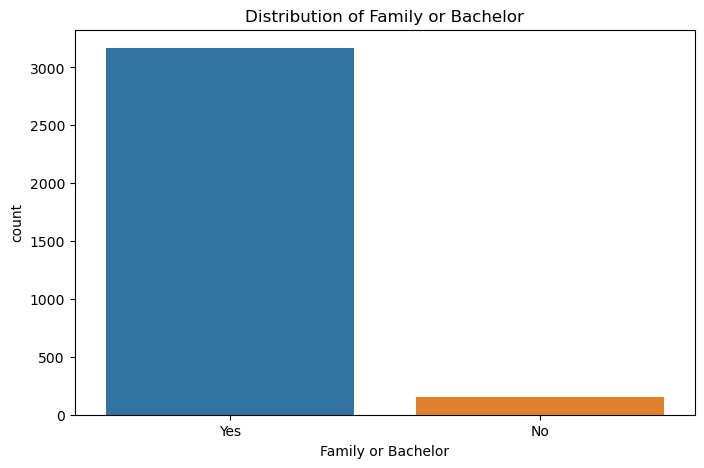

In [32]:
# Categorical variable distribution
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

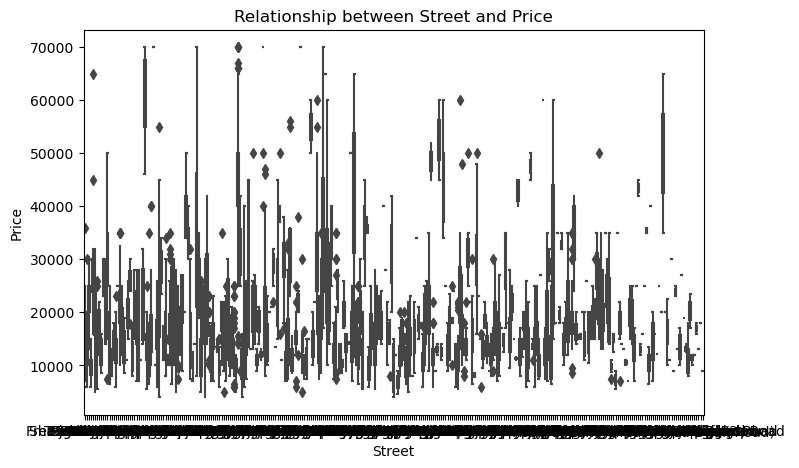

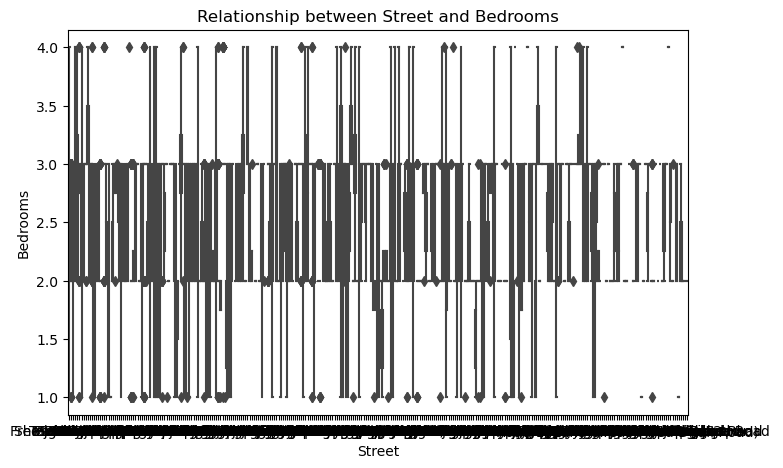

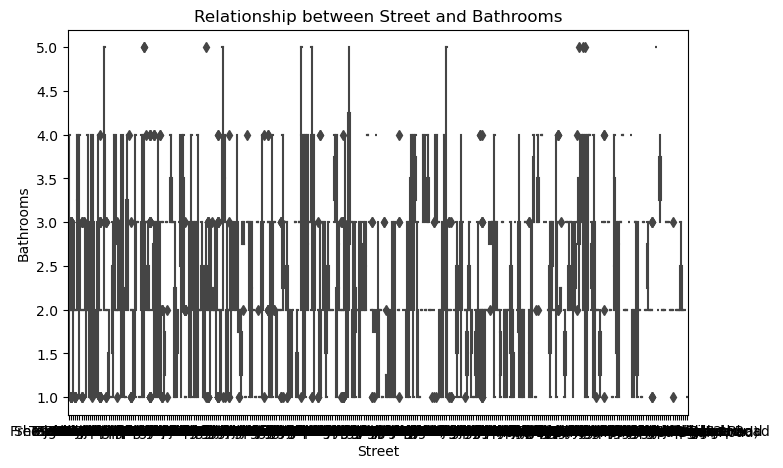

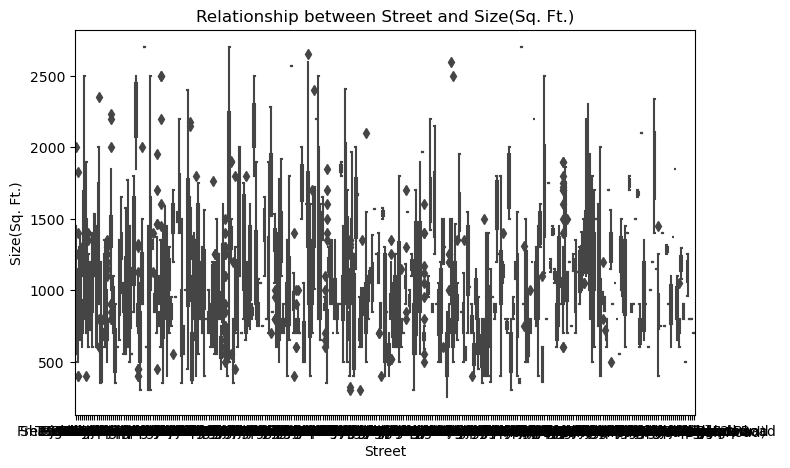

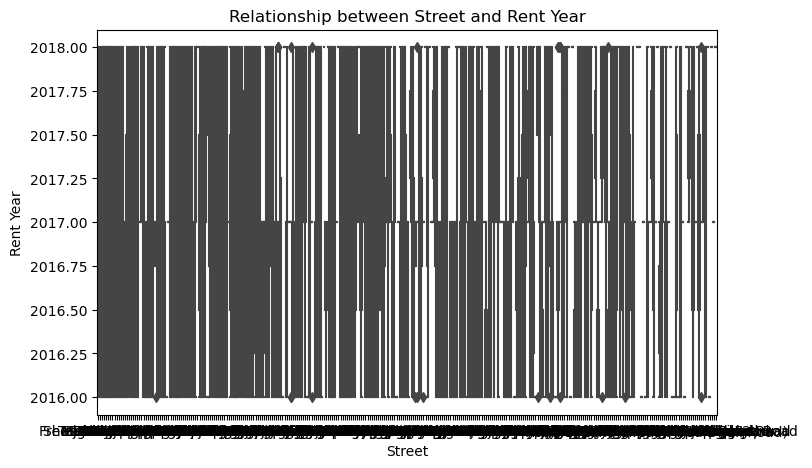

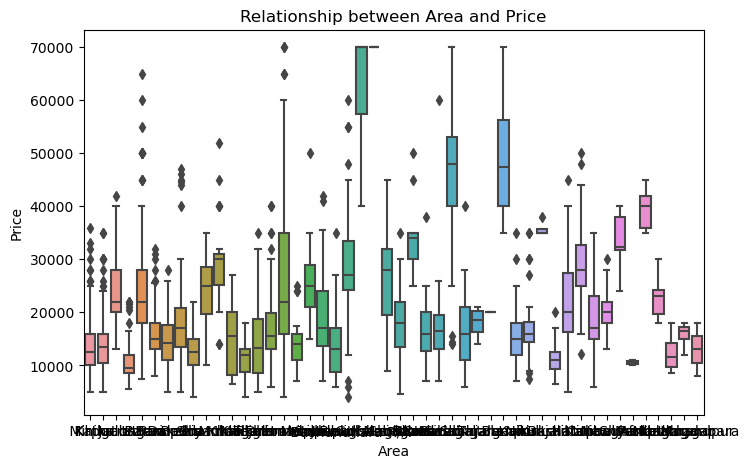

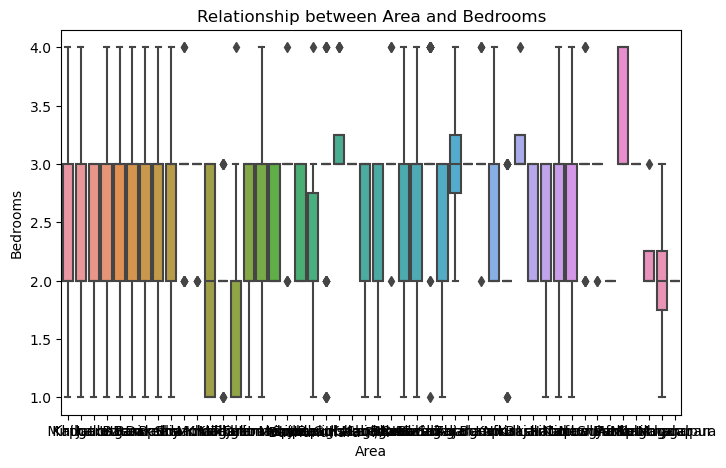

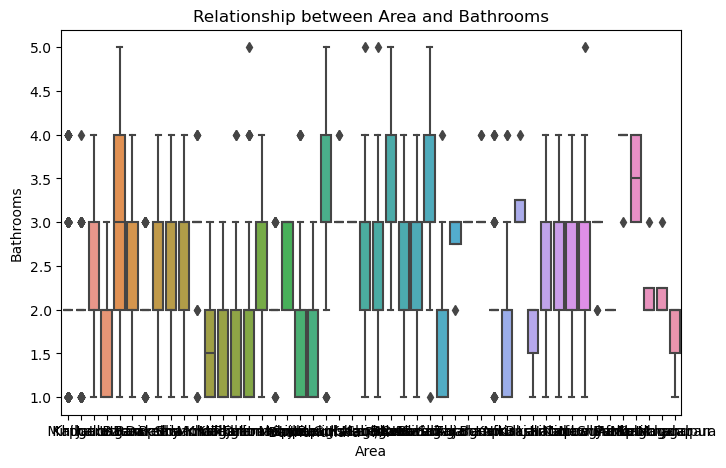

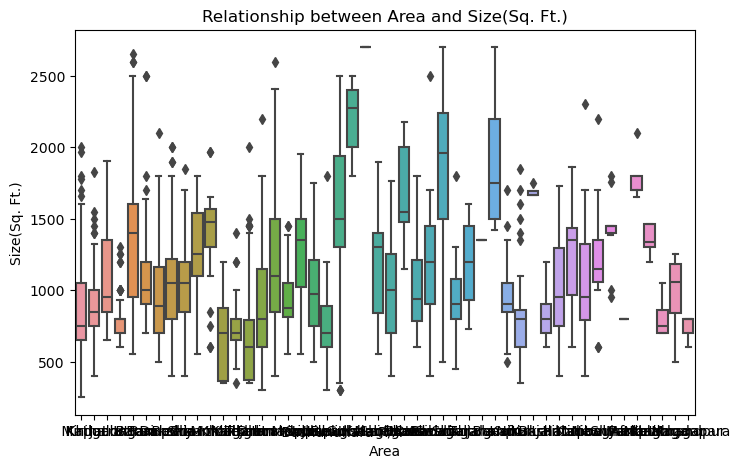

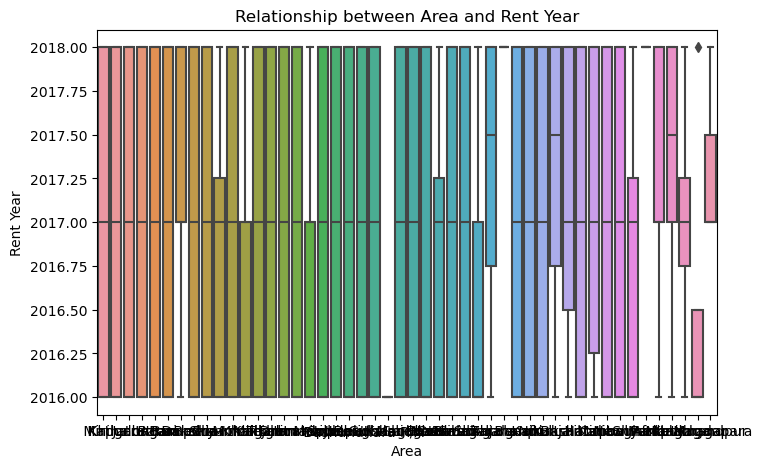

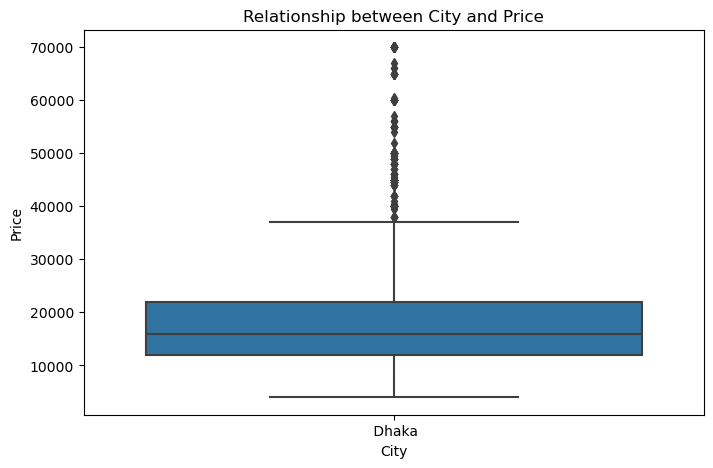

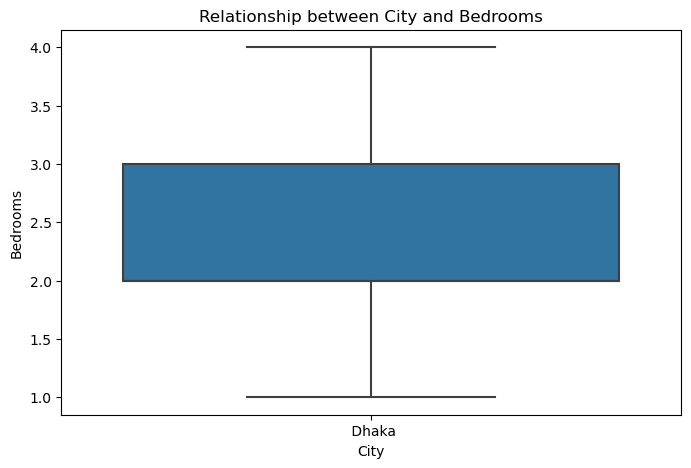

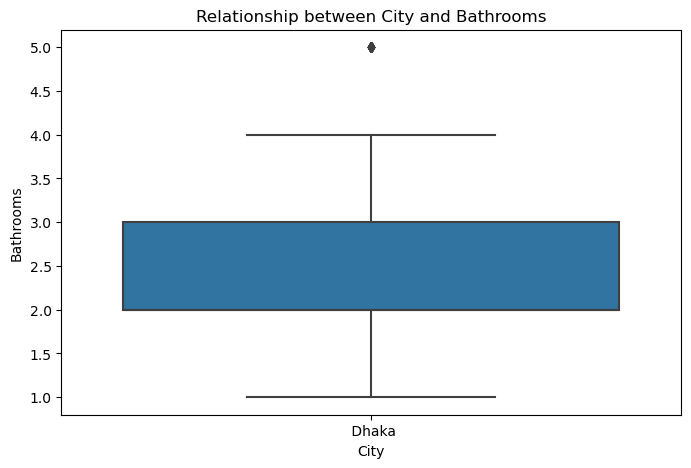

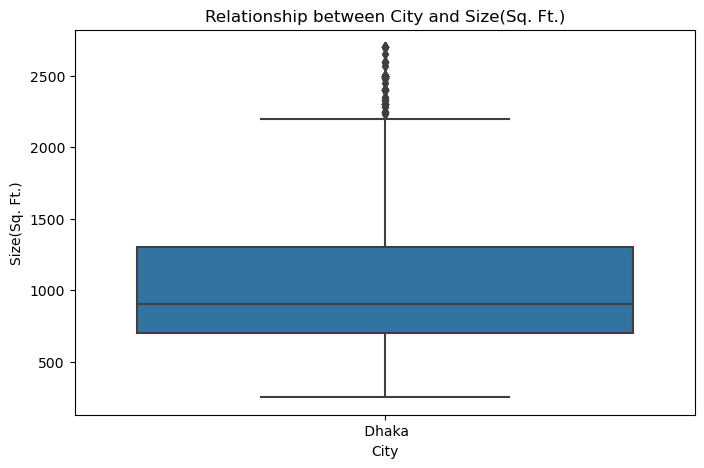

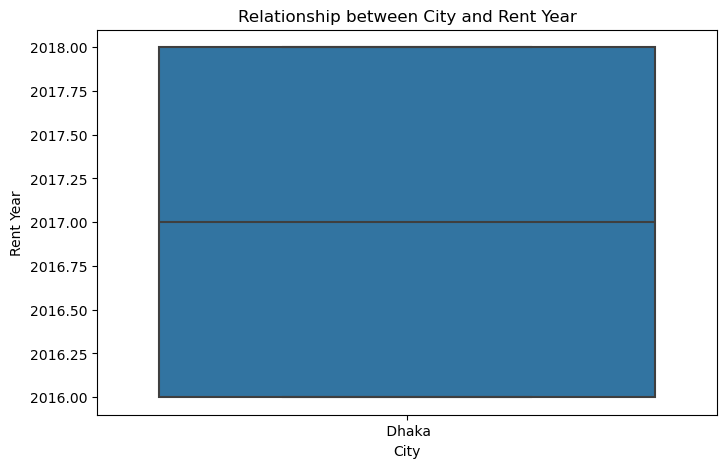

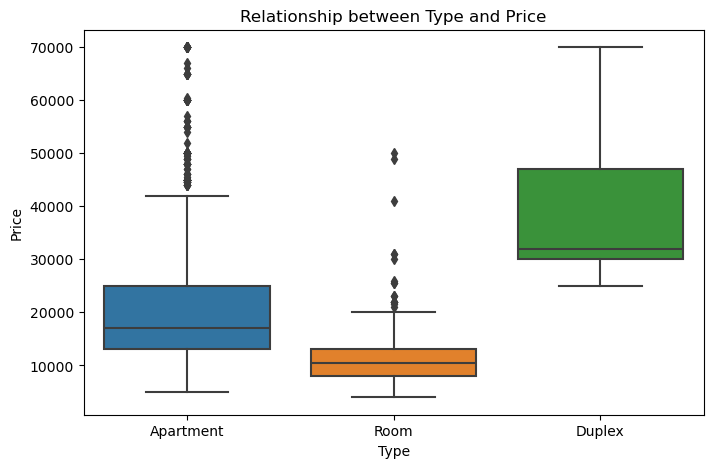

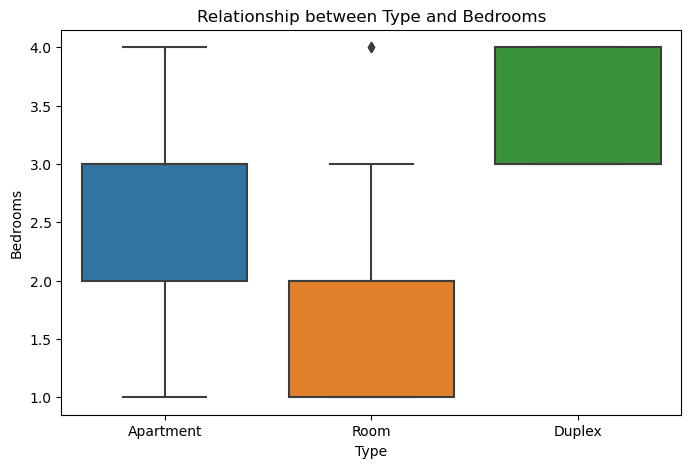

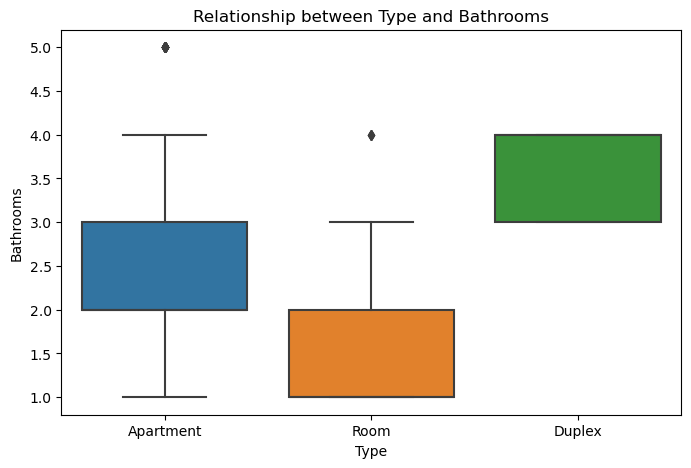

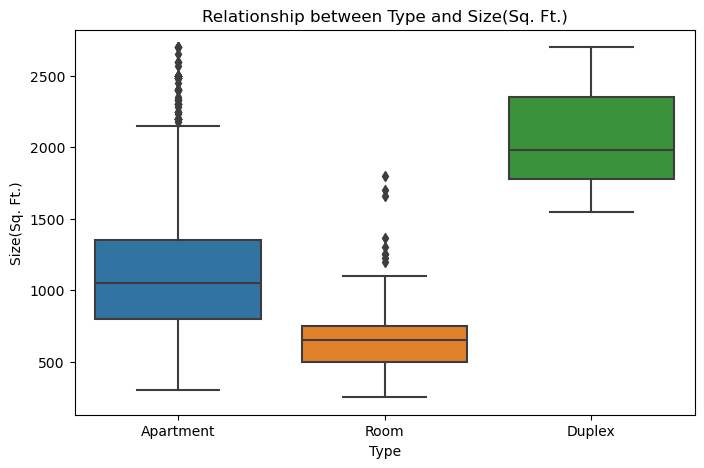

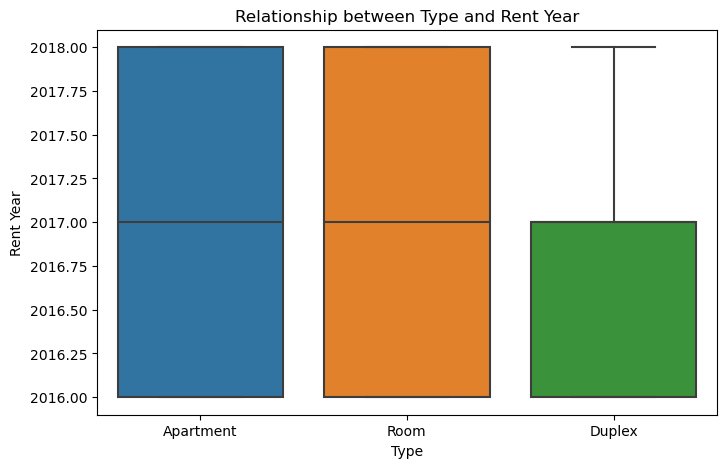

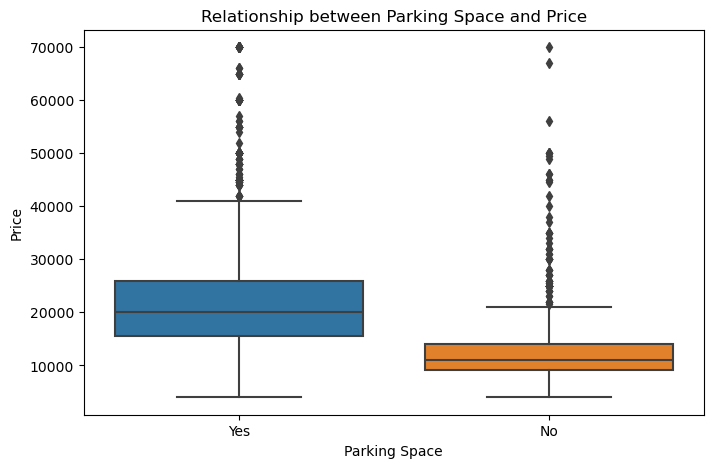

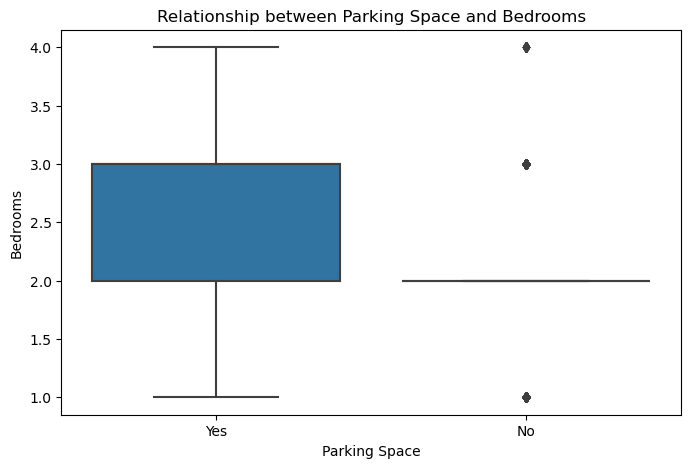

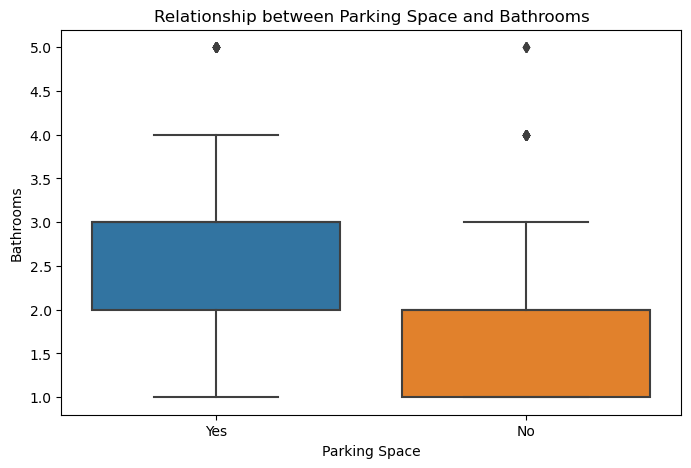

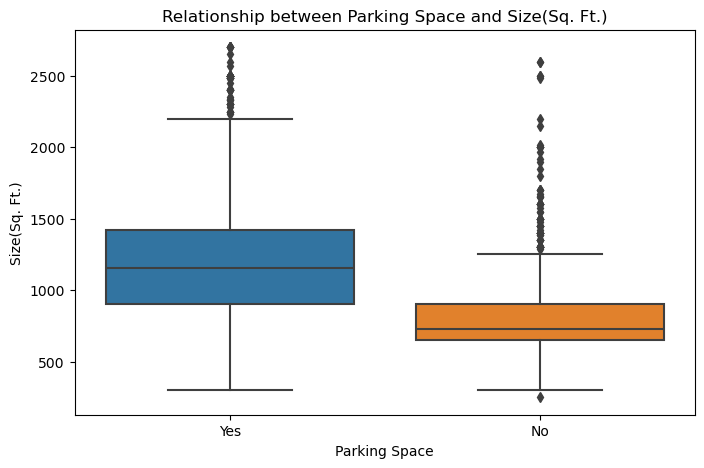

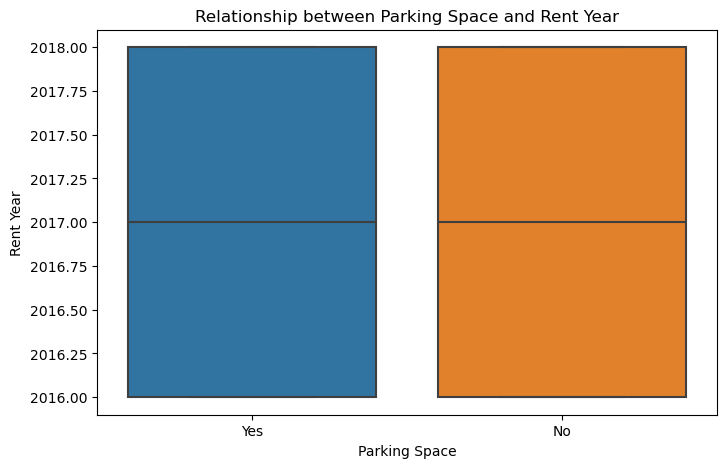

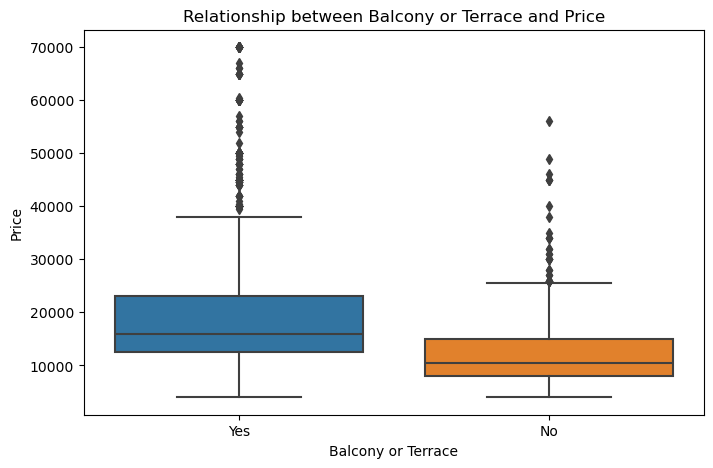

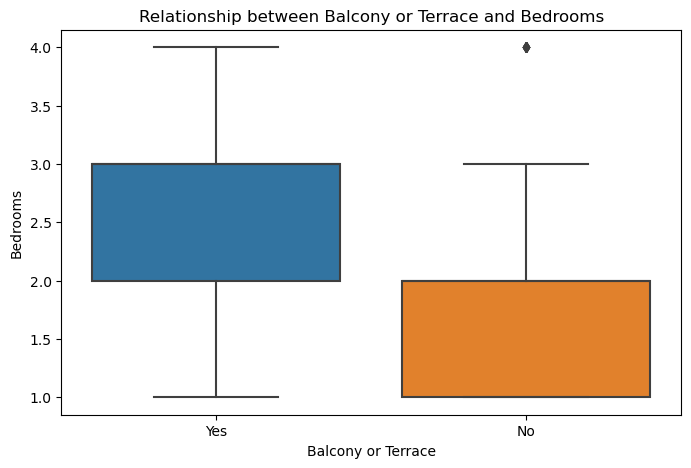

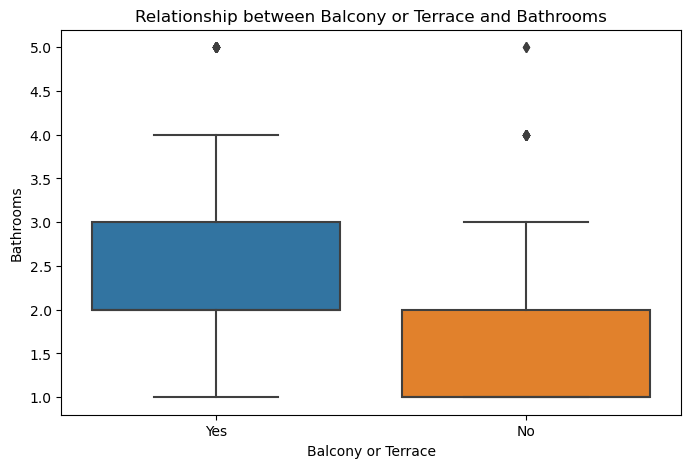

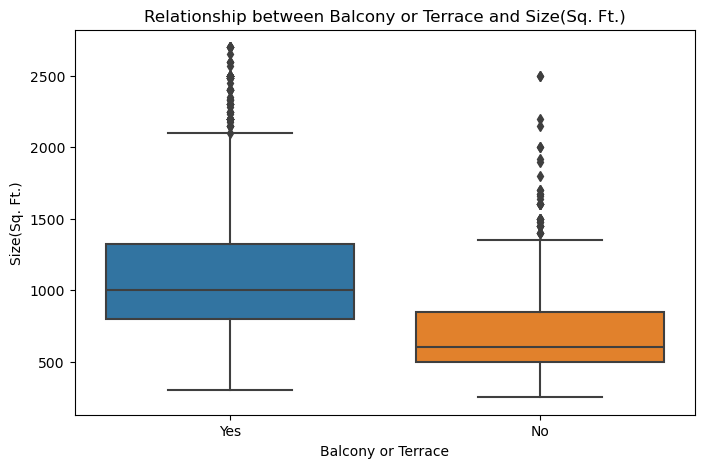

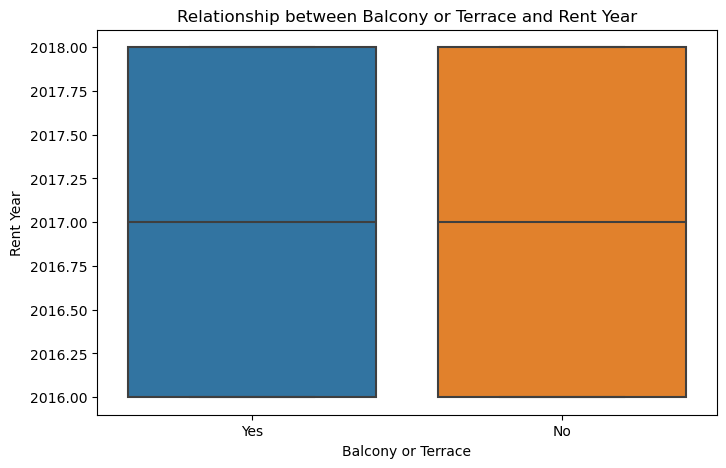

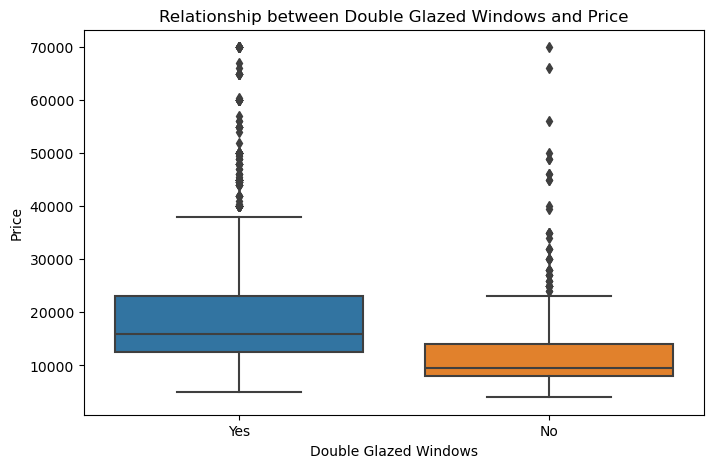

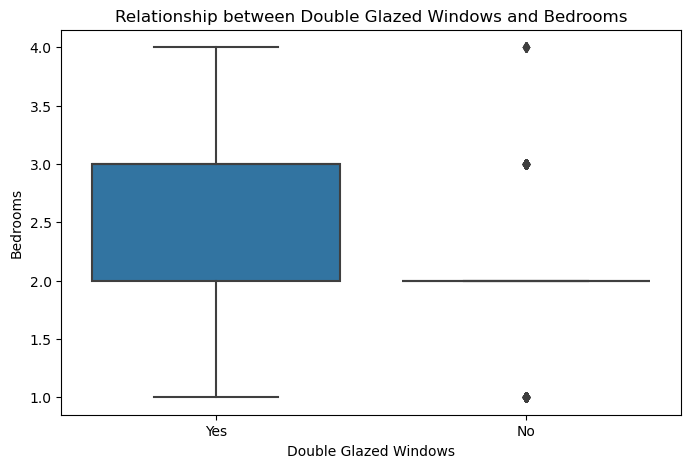

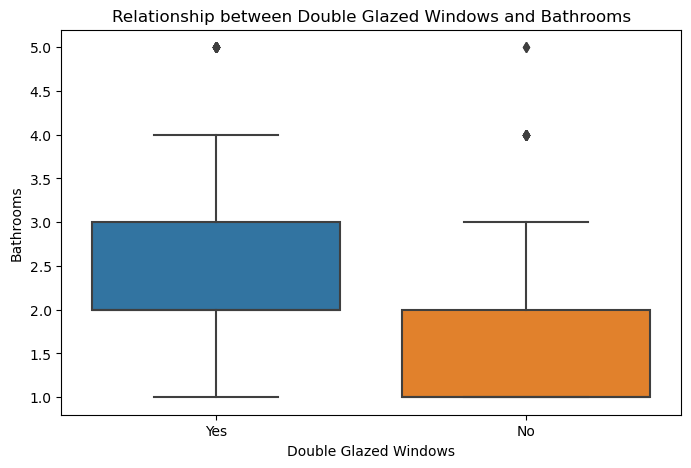

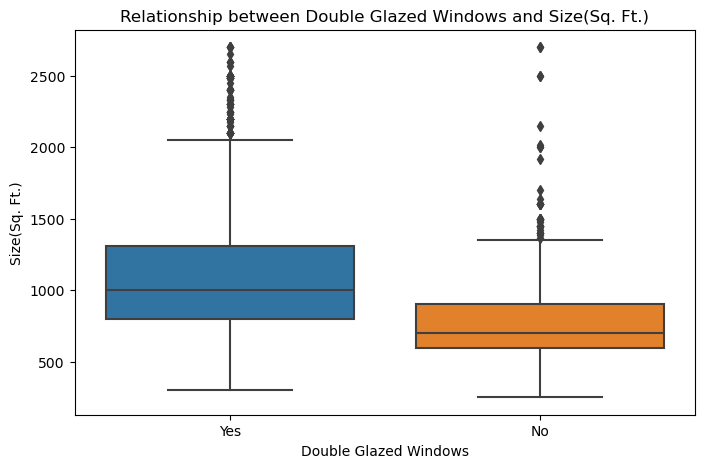

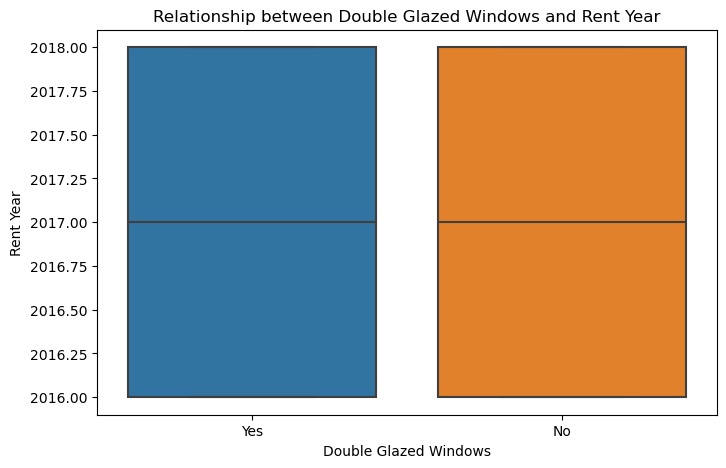

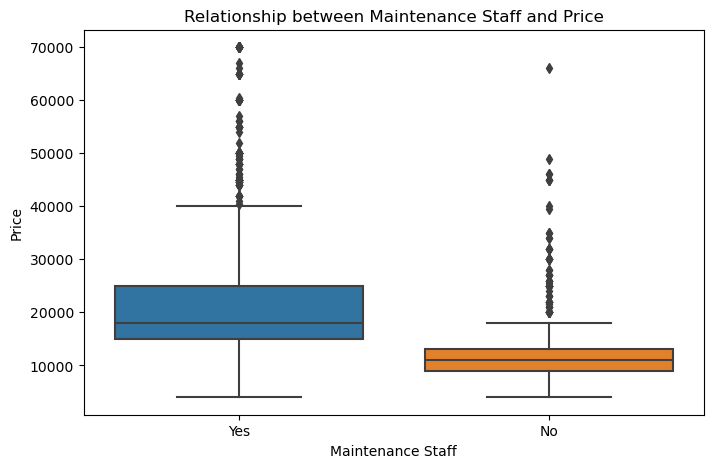

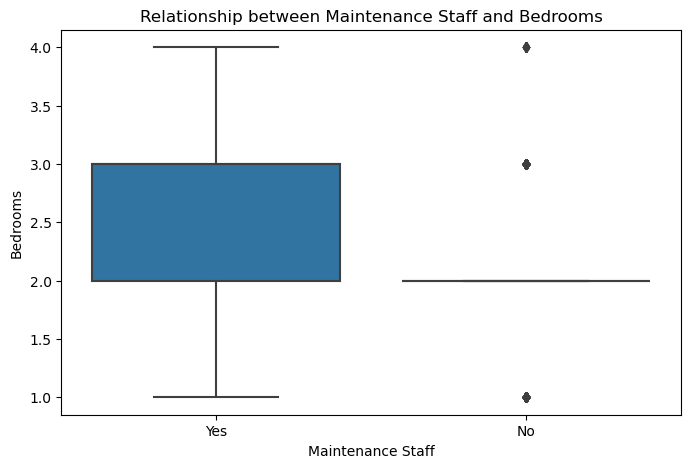

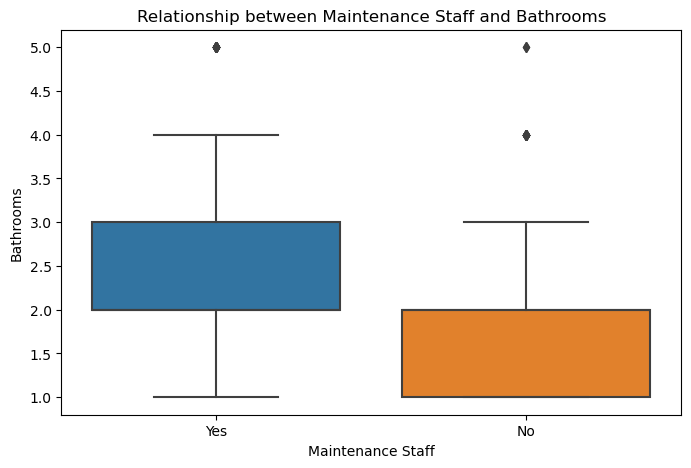

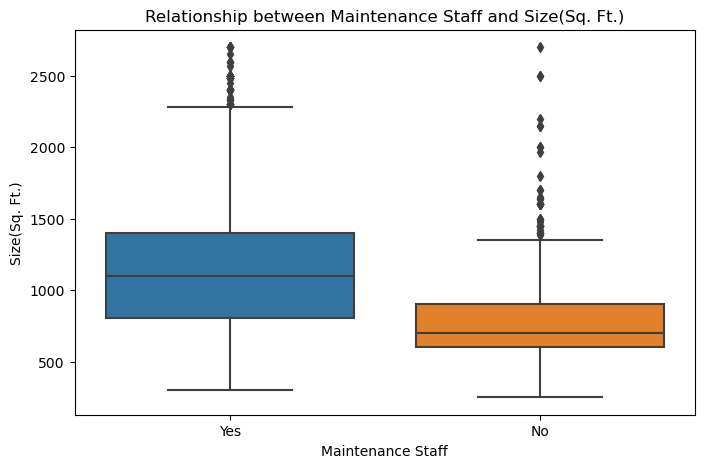

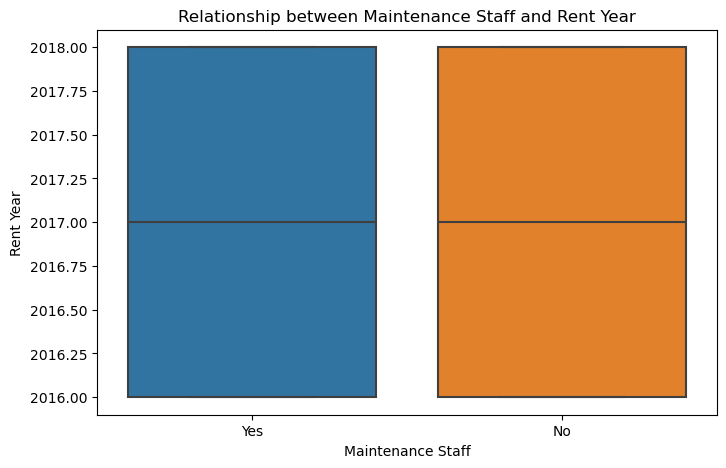

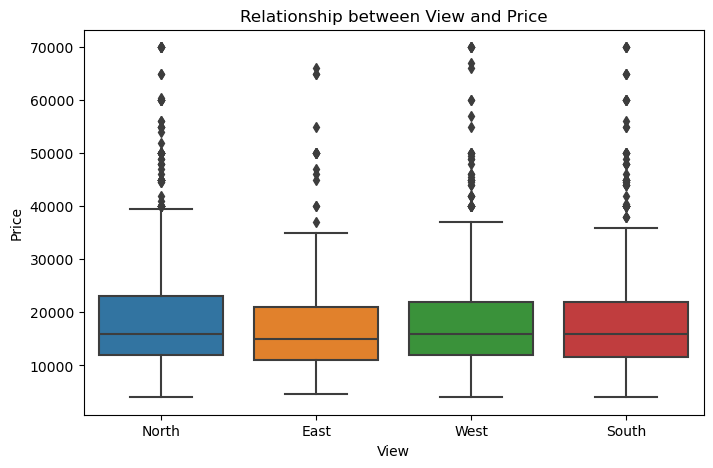

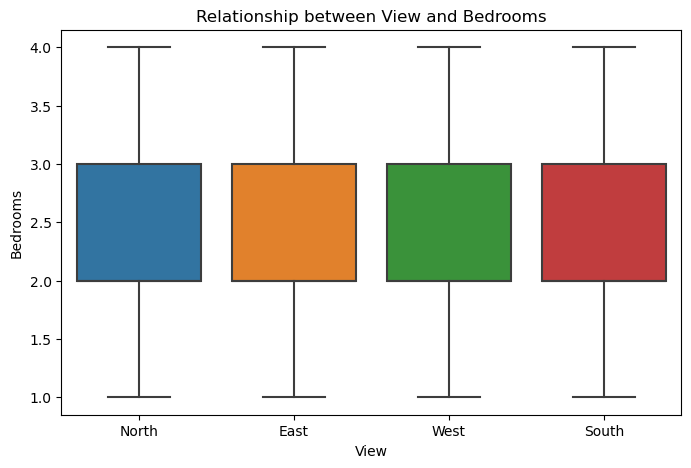

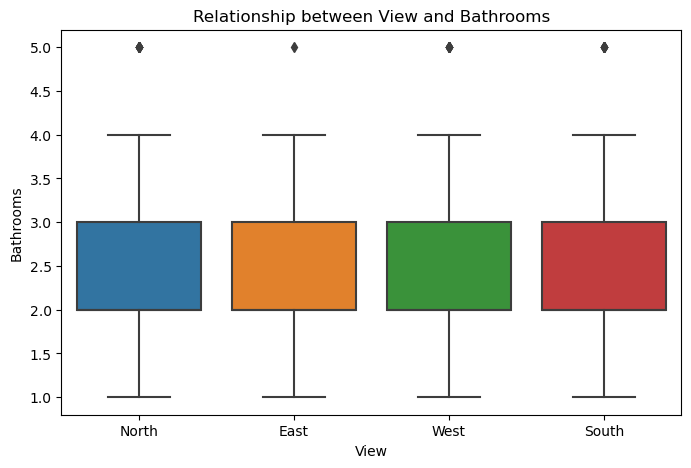

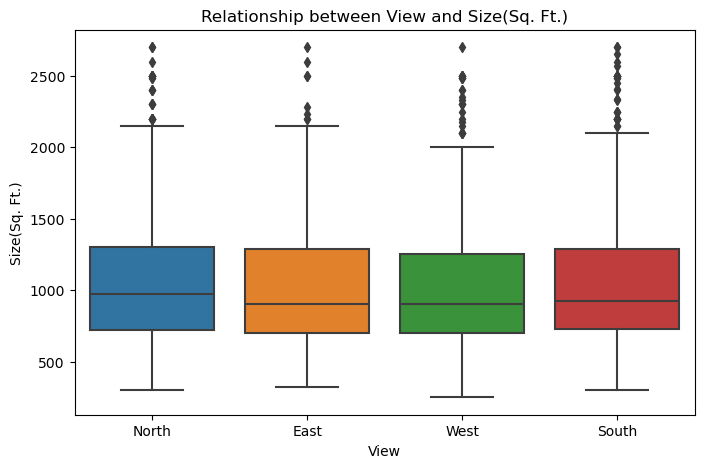

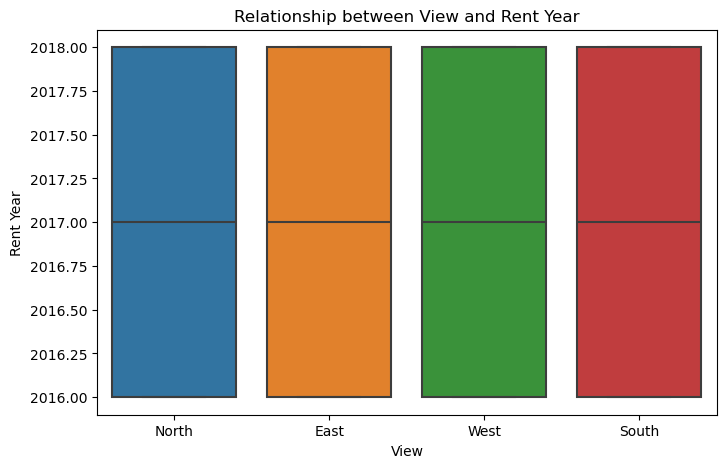

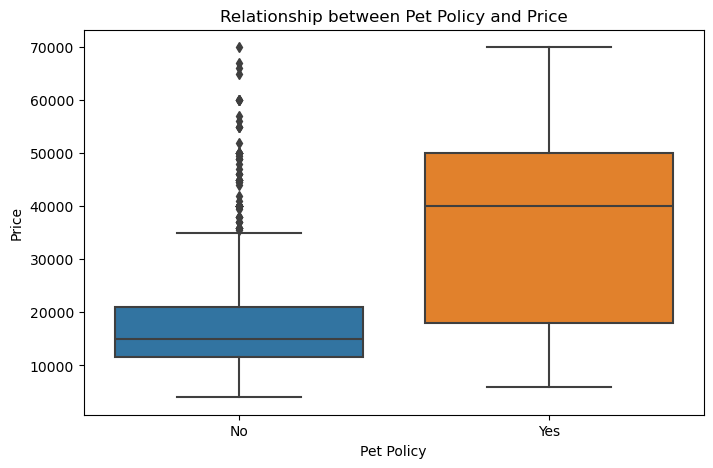

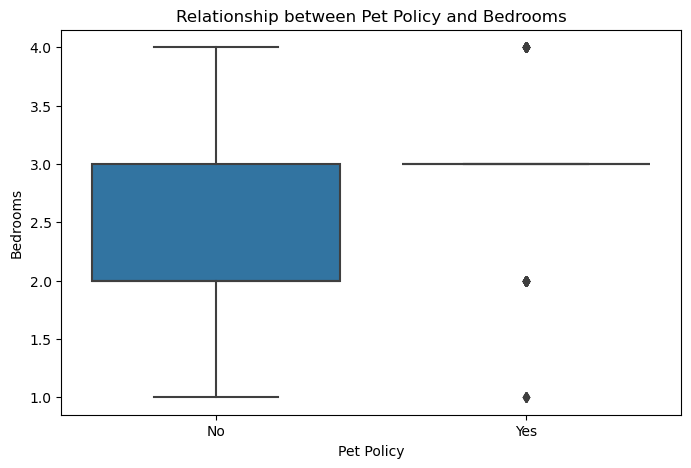

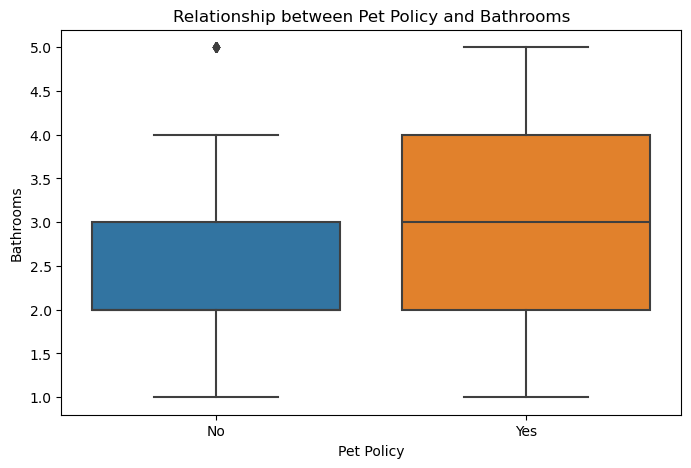

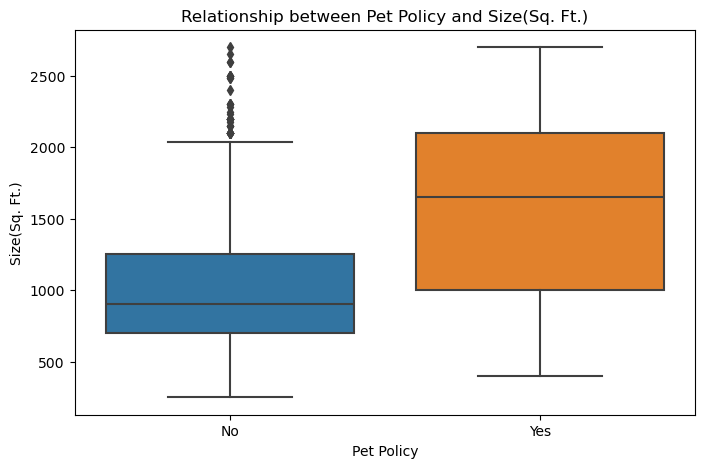

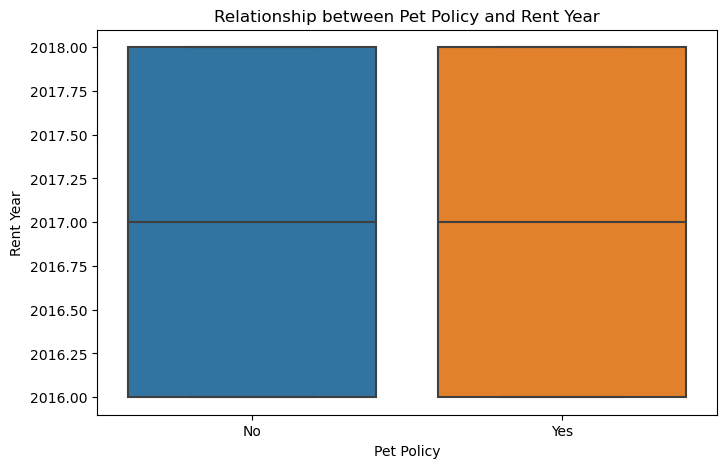

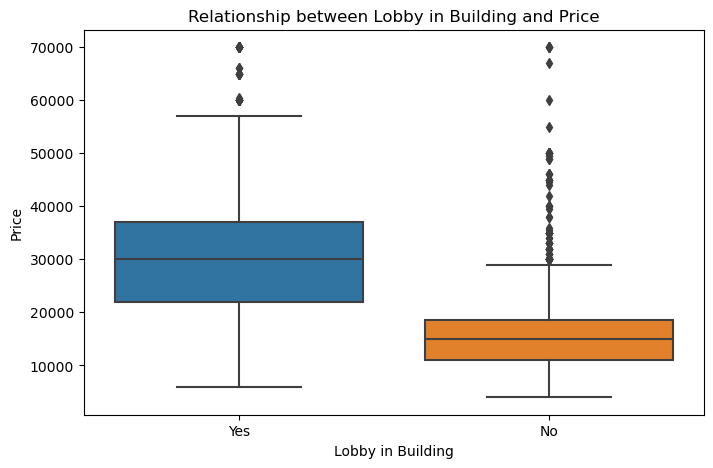

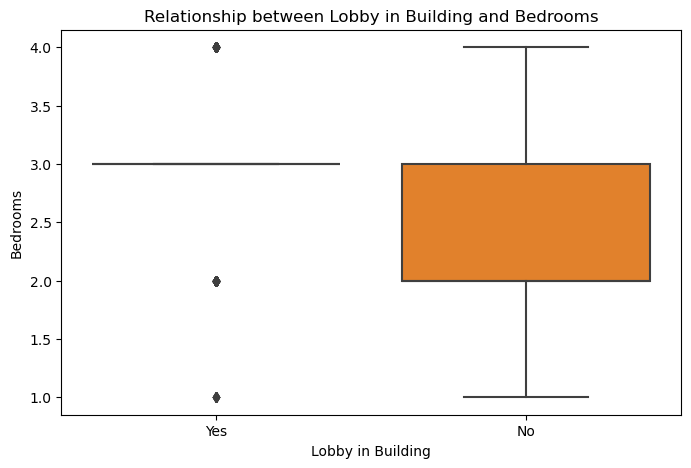

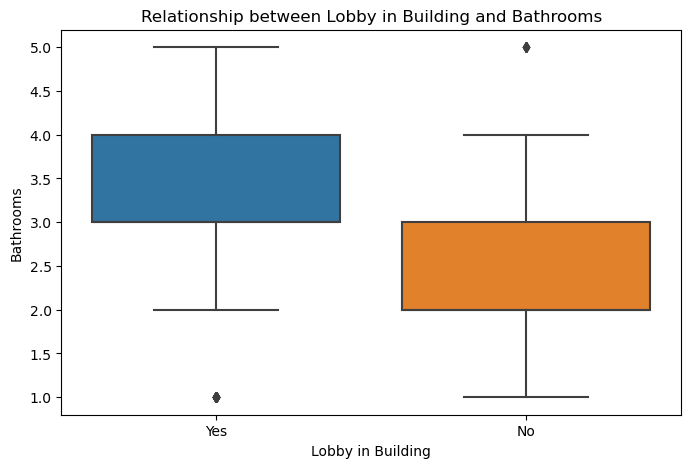

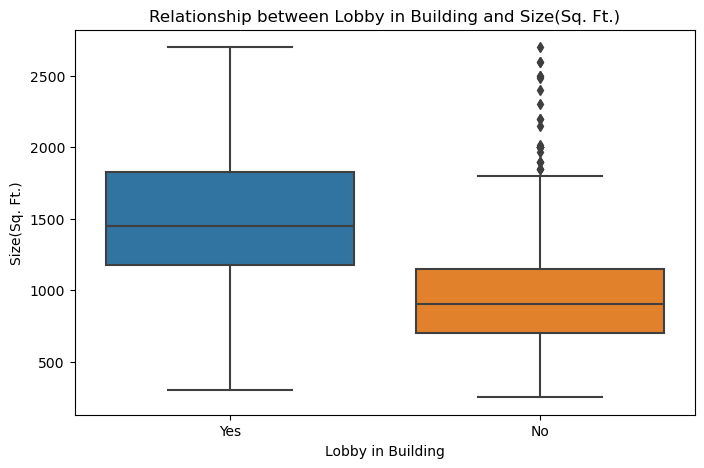

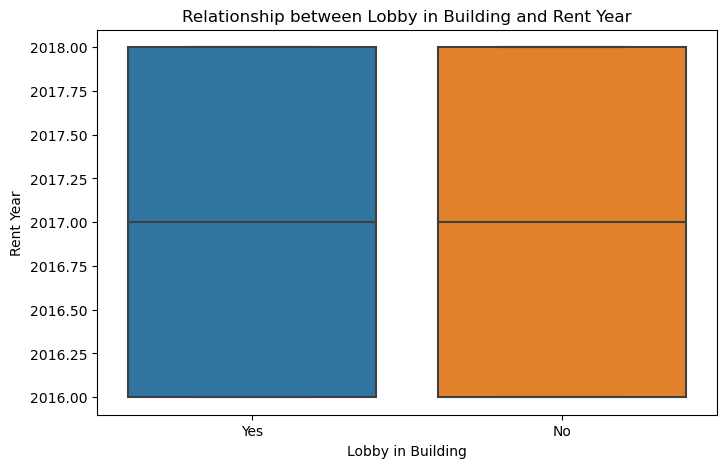

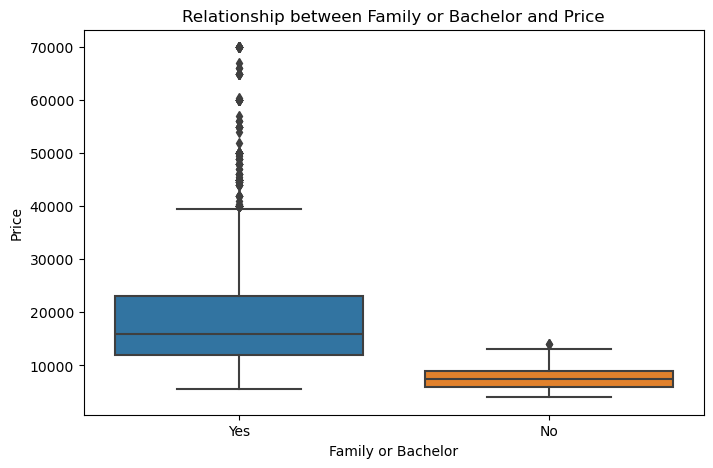

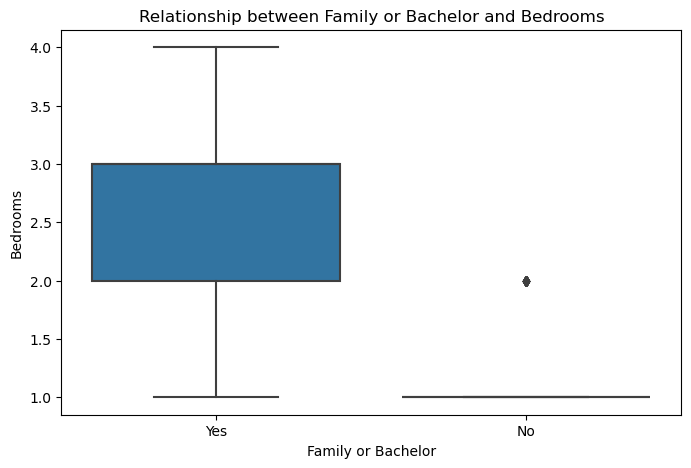

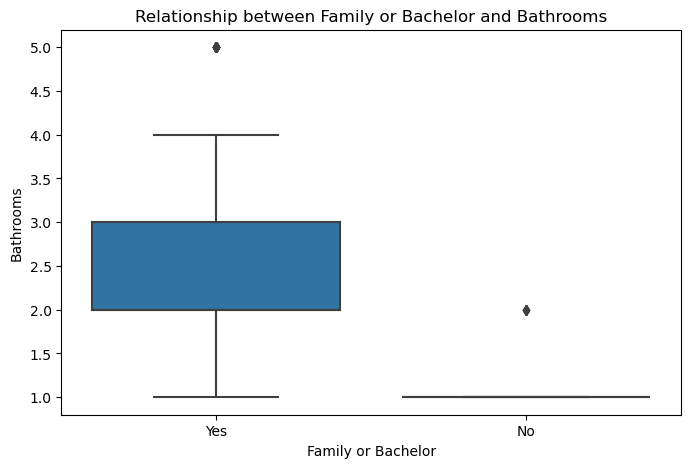

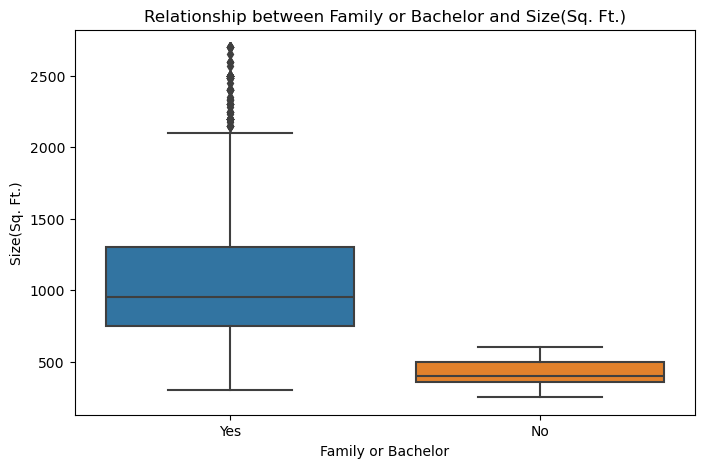

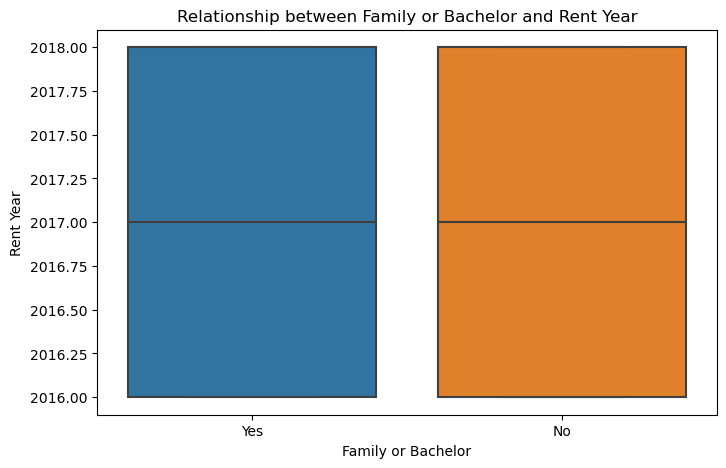

In [33]:
# Relationship between categorical and continuous variables
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

for cat_column in categorical_columns:
    for num_column in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'Relationship between {cat_column} and {num_column}')
        plt.show()

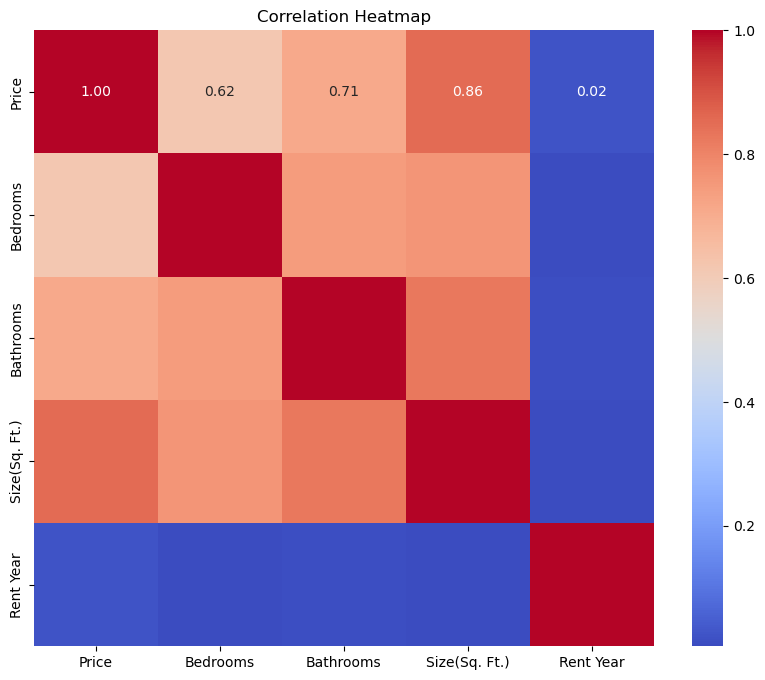

In [34]:
# Draw correlation using Pearson's Heat-map (Numeric Columns)
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

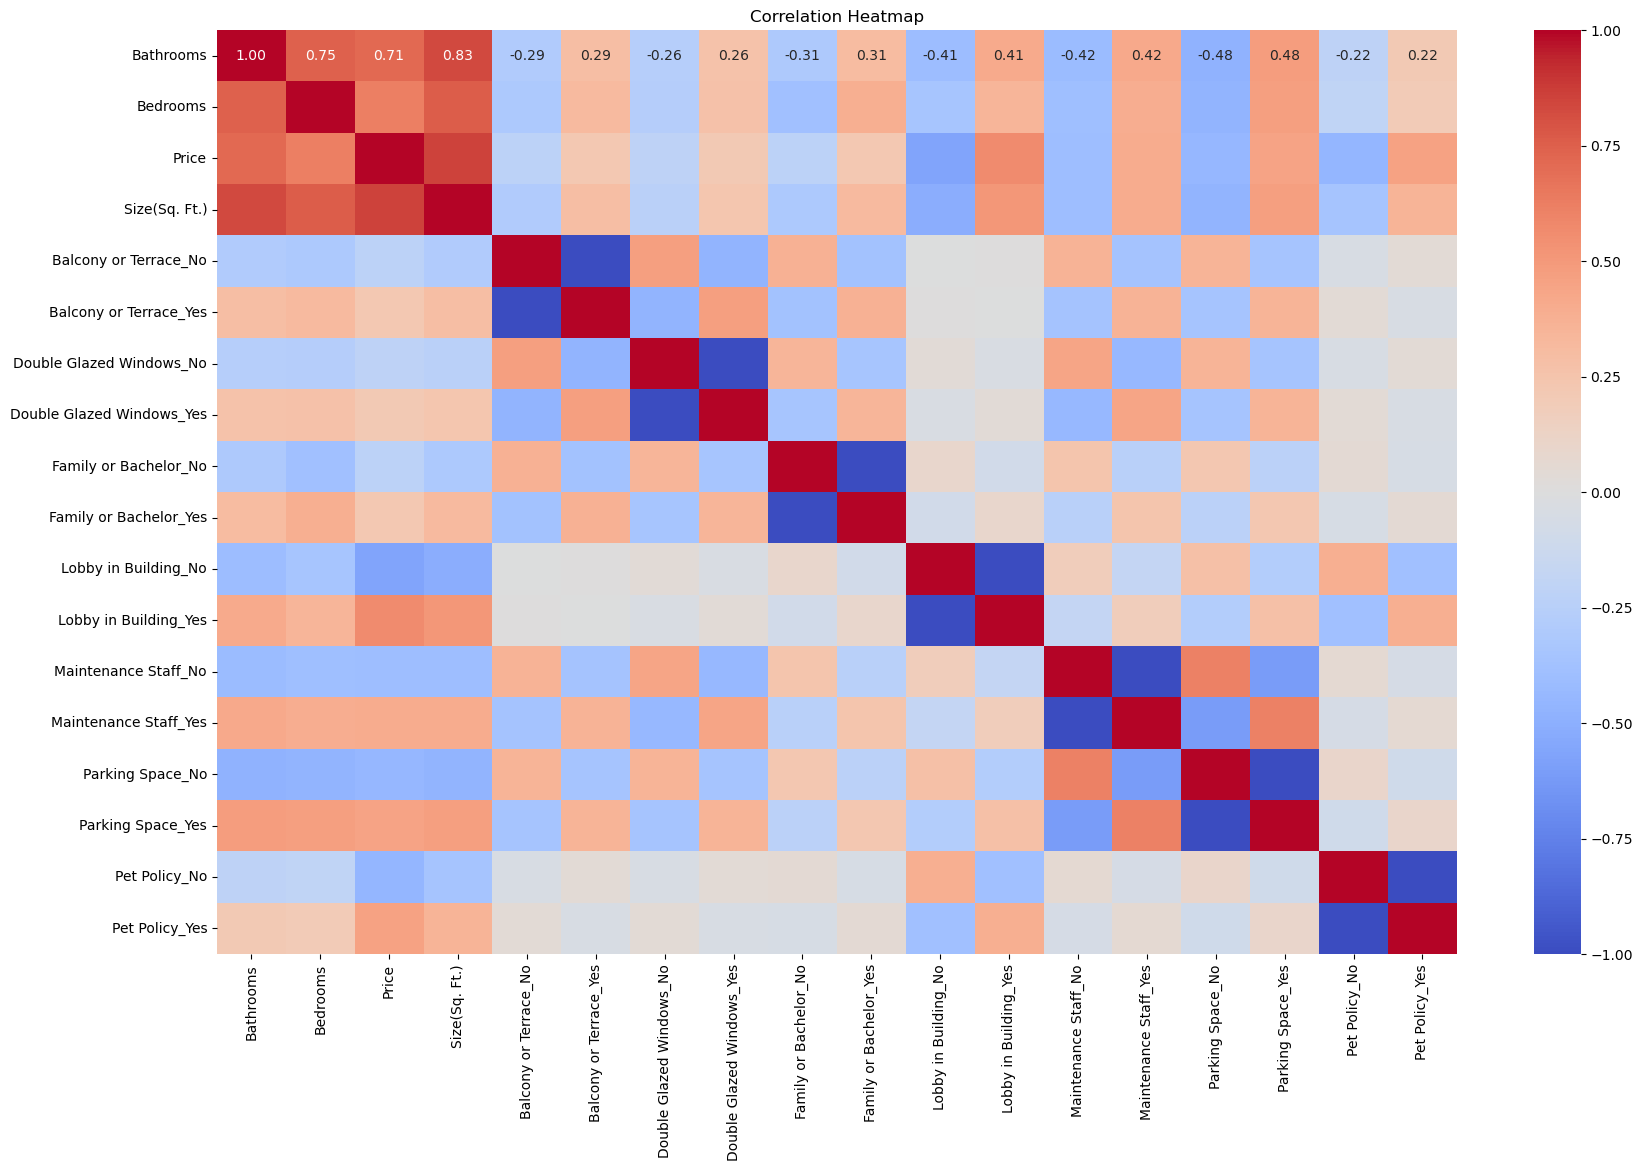

In [35]:
# Draw correlation using Pearson's Heat-map (All columns)
# Create a new DataFrame with one-hot encoding for categorical columns
df_selectedColumns = df.loc[:, df.columns.difference(['City', 'Area', 'Street', 'Rent Year', 'View', 'Type'])];
df_encoded = pd.get_dummies(df_selectedColumns)
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()
# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Model Validations

So the idea of this dataset is make a house price prediction value based on features we are going yo apply the linear model regression

In [36]:
df

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,10500,Section 11,Mirpur,Dhaka,Room,2,2,650,No,Yes,Yes,No,North,No,No,Yes,2018
3500,25000,Block G,Bashundhara R/A,Dhaka,Apartment,3,3,1500,Yes,Yes,Yes,Yes,North,No,No,Yes,2018
3501,14000,Shahinbag,Tejgaon,Dhaka,Apartment,2,1,600,Yes,Yes,Yes,Yes,South,No,No,Yes,2018
3502,40000,Block F,Lalmatia,Dhaka,Apartment,3,3,1650,Yes,Yes,Yes,Yes,South,No,Yes,Yes,2016


## Split and Train Data

In [53]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
# Split data into train and test
#X = df.drop('Price', axis = 1)
X_features = ['Size(Sq. Ft.)','Bedrooms','Bathrooms']
X, y = df[X_features].values, df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scale/normalize the training data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print("Peak to Peak range by column in Raw X")   
print(np.ptp(X_train,axis=0))
print(f"Peak to Peak range by column in Normalized X")
print(np.ptp(X_norm,axis=0))

Peak to Peak range by column in Raw X
[2450    3    4]
Peak to Peak range by column in Normalized X
[5.77778151 4.45536315 4.60494747]


## Stochastic Gradient Descent Regressor

In [54]:
from sklearn.linear_model import SGDRegressor

In [40]:
# Create and fit regression model
sgdr = SGDRegressor(max_iter=1000, random_state=1)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(random_state=1)
number of iterations completed: 21, number of weight updates: 55693.0


In [41]:
# View parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [9162.05278163 -886.11308601  219.55934807], b:[18514.26983781]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [42]:
# Make predictions
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[13731.06944222 41601.20053957 16736.41805604 27792.51739882]
Target values 
[15000 60000 13000 25000]


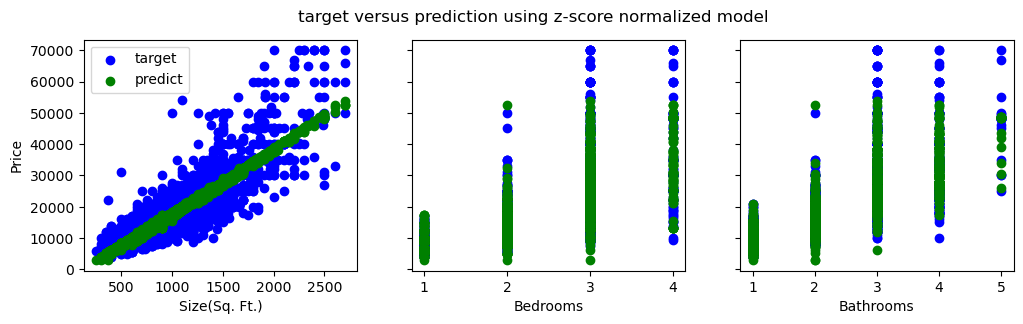

In [43]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='target', c="blue")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred, label='predict', c="green")
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

In [104]:
ridge_reg = Ridge(alpha=0.039)
ridge_reg.fit(X_train, y_train)

# Predict
y_pred = ridge_reg.predict(X_test)

# Accuracy
accuracy = ridge_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7632501377856913


## Mean Squared Error

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
accuracy = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", accuracy)

Mean Squared Error: 28012632.637147296


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [74]:
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)

# Predict
y_pred = linear_regr.predict(X_test)

# Accuracy
accuracy = linear_regr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7632504474479784


# Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [107]:
# Initialize and train Random Forest classifier
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
rf_regr = RandomForestRegressor(max_depth=2, random_state=42)
rf_regr.fit(X_train, y_train)

# Predict
y_pred = rf_regr.predict(X_test)

# Accuracy
accuracy = rf_regr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7267410612633721


## Support Vector Machine

In [64]:
from sklearn import svm

In [108]:
svm_regr = svm.SVR()
svm_regr.fit(X_train, y_train)

# Predict
y_pred = svm_regr.predict(X_test)

# Accuracy
accuracy = svm_regr.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: -0.02235130696587917


# K-Nearest Neighborhood

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [120]:
# Initialize and train KNN classifier
knn_regr = KNeighborsRegressor(n_neighbors=3)
knn_regr.fit(X_train, y_train)

# Predict
y_pred = knn_regr.predict(X_test)

# Calculate accuracy
accuracy = knn_regr.score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Expected 2D array, got 1D array instead:
array=[10500 10000 15000 22000 13000 19000 10500 16000  9000 20000 10000 28000
 23000 57000  8000 40000 13500 21000 13500 16000  9000 30000 32000 12000
  9000 20000 19000 13500 30000 18000 24500 10500 21000 70000 15000  9500
 13500 25000 12000 10000 10000 18000 30000 30000 14000 21000 12500 70000
 12500 14500 18000  9000 12000 18500 16000 70000 16000 20000 18000 12000
 11000 10500 20000 35000 16500 12000 27000 30000 35000 16000 40000  7000
 10500 12500 15000  8000 26000 11000 23000 32500  8500 14000 40000 11000
 22000 11500 17000 40000 20500 30500 13000 10000 11500 12500 34000 14000
 50000 11000 13000 18000 10500 21000 35000 45000 18000 11500  9000 10000
 17000 10000 11000 12000 23000  5000 35000 17000 20000 25000 18000 35000
 42000 13000 20000 22000 20000 14000 15000 27000 23000  6500 20000 70000
 35000 25000 11500 12000 38000 15000  4000 17000  6000 23000 16300 12000
 17000 15000  7000 20000 18000 15000 18000 18000 17000 20000  8000 10000
 11000 10000 20000  9000 22000 17000 16000 14000 70000 14000 10000 10000
 16500 23000 21000 14000 14500 22000 13000 10000 13500 20000 19600 14000
 11500 40000 14000 30000 11000 26000  9500 45000 16000 21000 22000 21500
 20000 14000 16000 15000 22000 16000 12500 12000 15000 12500 23000 18000
  9000 15000 22000 10000  7500 11000 14000 18000 12000 10000 18000 28000
 15500 25500 25000 25000 10000 30000 13000 10000 28000 20500 22000  5500
 11000 11500 22000 25000 40000 22000 22000 22000 12000 20000 12000 16500
 16000 14500 23000  9000  8000 32000 11000 24000  8500 17000 12000 20000
 23000  9000  8000  8000 19000  9000 24000 13000  7500 14000 18000 27000
  9500 28000  9000 11000 16000 39500 45000 35000 12000  9000 11000 12000
  9500 25000 11500 13500 12000 23000 18000  8500 28000 13000 17000  9500
 65000 13000 60500  9500 13000 22000 20000 10000 14000 13000 12000 18000
 17000 11500 14000 49000 13500 15000 12500 15000 20000 20000 14000 50000
 15000 16000 35000  9500  9000 25000 11000 15000 11500 12000 25000 45500
 20000 50000 66000 10000 26000 14000 28000 11200 22000 13500 12000 17000
 11000 12000 11000 25000 14000 15000 13000 15000 17000 25000 14000 10000
  6000 18000 27000  8500  9500 45000 13000 32000  6000  6500 26000 18000
 13500  7500 13000 10000 24000 40000  9000 15000 30000 35000 23000 11000
 10000  6000  9000 12000 16000  8000 16000 15000 12500 14000 13000 16000
 18000 12000 18000 17000  9500 16000 56000  8000 35000 14000 30000 15400
  5500 11000 14500 15000  8700 15500 10000 15000 49000 11500 25000 10500
 28000 10500 10500 26000 23000  8500  7000  9000 14000 20000 16000 14000
 12000 30500 18000 18000 11000 14000  8000 20000 12000 15000 17000 14000
 22000  9000 50000 11500  9000 50000 11000 15000 10000 22000 10000 22000
 18000 17000 13000 23000 14000 20800 15000 23000 22000 35000 12000 36000
 15000  8500 18000 20000 10500 14000 17500 13000 14000 20000 15000 14000
 15100  8000 12500 11000 28000 30000 26000 12000 27000 15000 15000 34000
 15000 14500  7500 11000 11500 18000 35000  9500 18000 16000 23000 37000
 15000 12000  9000 13000 35000 14000 10000  9500 10500 20000 14000  8000
 16500 15000 40000  9000 19500 21500 13000 46000 15000 15000 26000 13000
 11000 14000  9500 10000 12000 13000 14000 22000 18000 12000 12500 23000
 18000 12000 35000 13000 13000  6500 13000 15000 34000 33000 25000  8000
 15000  8000 12000 18000 20000 12000 25000 45000 12500 28000 10000 15000
 15000 14500 12000  9500 14000 24000 20000 18000 12000 11500 20000 26000
 30000 15000 20000 30000 12000  7000 13000 27000 17000  6000 10000 15000
 12000 17000 19000 65000 18150 16000 20000 18000 17500 20000 26000 22000
 12000 20000 25000 18000 25000 11500 25000 18000 25000 10000 16000 12000
 20000 32000 27000 16000 44500 35000 10000  8500 10000 26000 17500  7500
  9500 16000 56000 17000 45000 50000 11000 15000 25000 20000  9000 22000
 17000 18000 10000 21000 19000 45000  8000 35000  6000 12000 45000 18000
 30000 18000 11000 22000 16000 22000 30000 26000  8500  9000 22000 22000
 13000 30000 23000 12000 16000  8500 14000 17000 19000  8000 15000 10000
 10000 25000 20000 32500].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.